# AIM OF THE PROJECT

 DIC Finance Company deals in all home loans.They have presence across all urban,semi urban and rural areas.Customer first apply for home loans after that the company validates the customer eligibility for loan.The company wants to automate the loan eligibility based on customer details provided while filling the application form.So I have attempted to prepare a project where the model can predict the loan approval and hence can accelerate the decision making process for determining whether the applicant is eligible for a loan or not.     

# The Machine Learning Models used in the project

In [ ]:
#----Logistic Regression
#-----RandomForest Classifier
#-----Decision Tree Classifier
#----Support Vector Classifier
#----RandomForest Classifier(Randomizedsearch cv)
#----RandomForest Classifier(Gridsearch cv)
#----Decision Tree classifier(Randomizedsearch cv)
#----Support vector classifier(Gridsearch cv)
#----Logistic Regression(Gridsearch cv)

# Dataset Description

In [ ]:
#LoanID-Loan Reference ID(unique)
#Gender-Applicant Gender(Male or female)
#Married-Applicant Marital Status(Married or not married)
#Dependents-Number of family members present
#Education-Applicant educational qualification(graduate or not graduate)
#Self_Employed-Applicant employment status
#Applicant Income-Applicant's monthly salary/income
#Coapplicant Income-Additional applicant's monthly salary
#LoanAmount-Loan amount taken
#Loan_Amount_Term-The Loan's repayment period(in days)
#Credit History-Records of previous creadit history(0:bad creadit history,1:good creadit history)
#Property Area-The location of the property(Rural/semi urban/urban)
#Loan Status--Status of the Loan whether approaved or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Loan_train= pd.read_csv("Train_data.csv")

In [3]:
Loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
Loan_test = pd.read_csv("Test_data.csv")

In [5]:
Loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
Loan_data = pd.concat((Loan_train, Loan_test))

In [7]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
Loan_data.shape

(981, 13)

In [9]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [10]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
Loan_data.isnull().mean()*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

<AxesSubplot:>

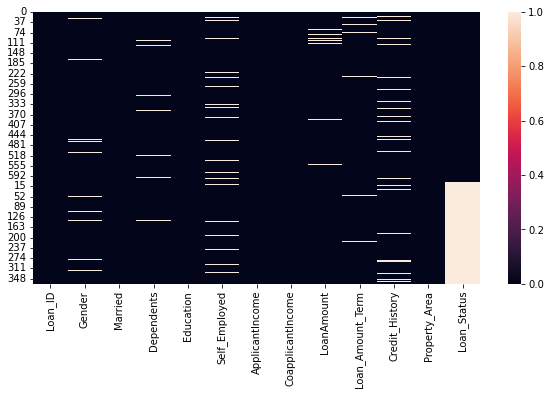

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(Loan_data.isnull())

In [13]:
cat_vars = [var for var in Loan_data if Loan_data[var].dtype == 'object']

In [14]:
cat_vars

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Exploratory Data Analysis

In [15]:
#UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

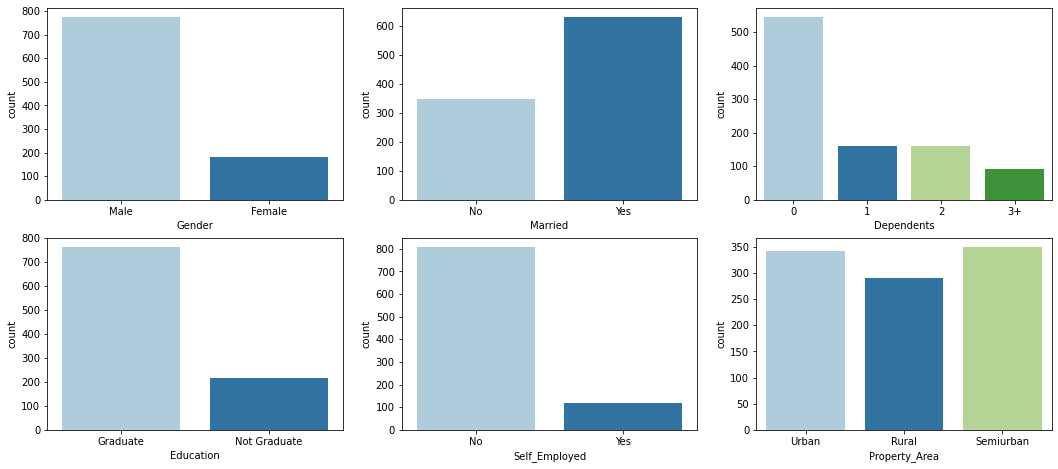

In [16]:
plt.figure(figsize = (18, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'Gender', data = Loan_data , palette = 'Paired' )

plt.subplot(3,3,2)
sns.countplot(x = 'Married', data = Loan_data , palette = 'Paired')

plt.subplot(3,3,3)
sns.countplot(x = 'Dependents', data = Loan_data , palette = 'Paired')
 
plt.subplot(3,3,4)
sns.countplot(x = 'Education', data = Loan_data , palette = 'Paired')

plt.subplot(3,3,5)
sns.countplot(x = 'Self_Employed', data = Loan_data , palette = 'Paired')
 
plt.subplot(3,3,6)
sns.countplot(x = 'Property_Area', data = Loan_data , palette = 'Paired')

In [17]:
#From the above we can conclude that number of Males are higher in number than Females
#Number of married people are more than unmarried people
#Number of dependents with count 0 are highest in number
#graduate people are higher in number than non-graduates
#Maximum people are not self-employed
#People in semi-urban area are highest in number

<AxesSubplot:ylabel='Loan_Status'>

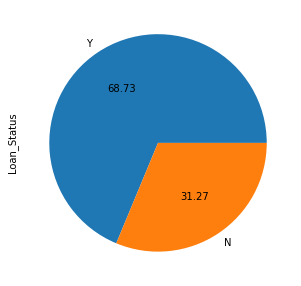

In [18]:
plt.figure(figsize = (8,5))
Loan_data['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [19]:
#Around 69% of the people got approved for the Loan

In [20]:
Loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
num_vars = Loan_data.select_dtypes(include = ['int64', 'float64'])

In [22]:
num_vars

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777.0,113.0,360.0,1.0
363,4158,709.0,115.0,360.0,1.0
364,3250,1993.0,126.0,360.0,NaN
365,5000,2393.0,158.0,360.0,1.0


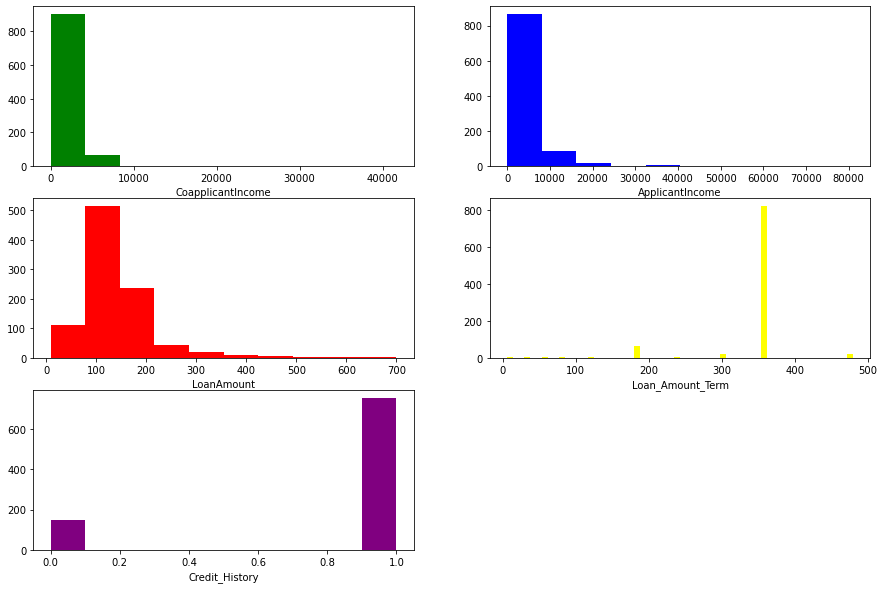

In [23]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
plt.hist(Loan_data['CoapplicantIncome'], color= 'green')
plt.xlabel("CoapplicantIncome")


plt.subplot(3,2,2)
plt.hist(Loan_data['ApplicantIncome'], color = 'blue')
plt.xlabel("ApplicantIncome")



plt.subplot(3,2,3)
plt.hist(Loan_data['LoanAmount'], color = 'red') 
plt.xlabel("LoanAmount") 


plt.subplot(3,2,4)
plt.hist(Loan_data['Loan_Amount_Term'], bins = 60, color = 'yellow') 
plt.xlabel("Loan_Amount_Term")


plt.subplot(3,2,5)
plt.hist(Loan_data['Credit_History'], color = 'purple') 
plt.xlabel("Credit_History")

plt.show()

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

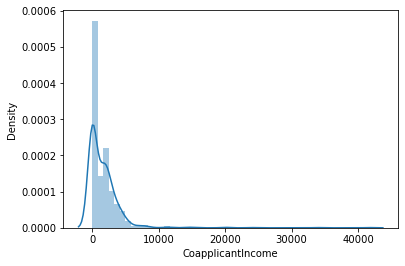

In [24]:
sns.distplot(Loan_data['CoapplicantIncome'])

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

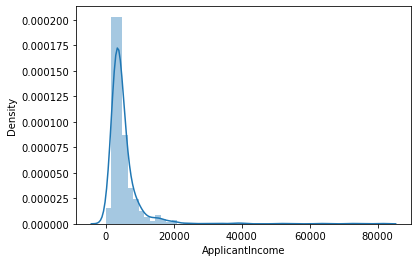

In [25]:
sns.distplot(Loan_data['ApplicantIncome'])

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

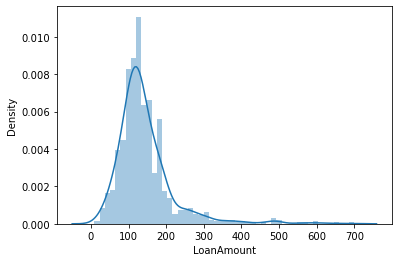

In [26]:
sns.distplot(Loan_data['LoanAmount'])

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

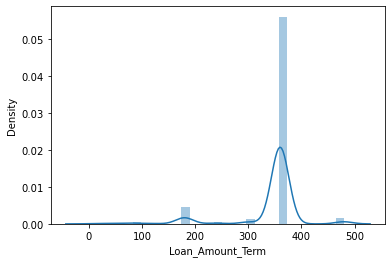

In [27]:
sns.distplot(Loan_data['Loan_Amount_Term'])

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

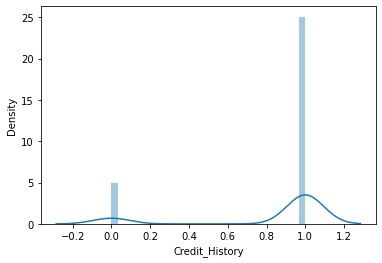

In [28]:
sns.distplot(Loan_data['Credit_History'])

In [29]:
#From above observation,it is observed that nature of coapplicant income is right skewed
#The nature of applicant income is also right skewed
#The nature of Loan amount is sort of normally distributed
#The nature of Loan amount term is left skewed
#The maximum number of people have credit history 1

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sayan\anaconda3\lib\si

<AxesSubplot:xlabel='Loan_Amount_Term'>

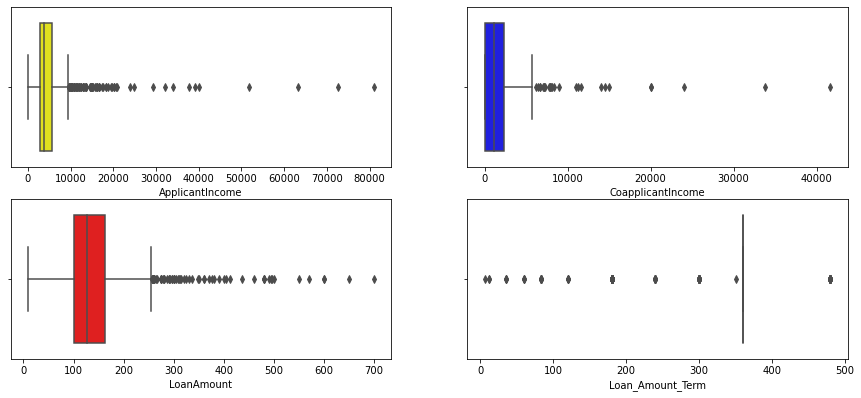

In [30]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.boxplot(Loan_data['ApplicantIncome'], color = 'yellow')

plt.subplot(3,2,2)
sns.boxplot(Loan_data['CoapplicantIncome'], color = 'blue')

plt.subplot(3,2,3)
sns.boxplot(Loan_data['LoanAmount'], color = 'red')

plt.subplot(3,2,4)
sns.boxplot(Loan_data['Loan_Amount_Term'], color = 'red')

In [31]:
#From the above it is observed that all these features are impacted by outliers

In [32]:
#BIVARIATE/MULTIVARIATE ANALYSIS

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

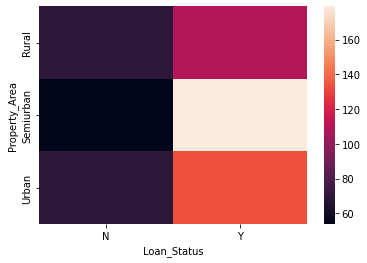

In [33]:
sns.heatmap(pd.crosstab(Loan_data['Property_Area'], Loan_data['Loan_Status']))

In [34]:
#From the sbove it is observed that people who are from semi-urban area have got maximum number number of loan approaved.

<AxesSubplot:xlabel='Gender'>

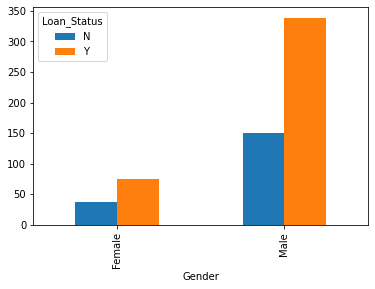

In [35]:
pd.crosstab(Loan_data['Gender'],Loan_data['Loan_Status']).plot(kind = 'bar')

In [36]:
#Male people got the higest number of loan approaved.

In [37]:
pd.crosstab(Loan_data['Education'], Loan_data['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [38]:
#Gradaute people got the highest number of loan approaved.

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

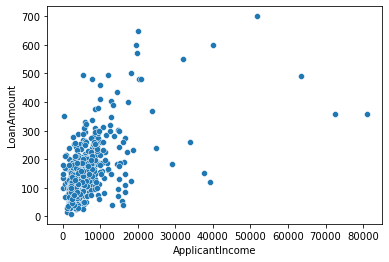

In [39]:
sns.scatterplot(Loan_data['ApplicantIncome'],Loan_data['LoanAmount'])

In [40]:
#The relationship between applicant income and loan amount is sort of linear.with icrease in applicant income the loan amount also increase.
#except few exceptipons are there.

<AxesSubplot:xlabel='Education'>

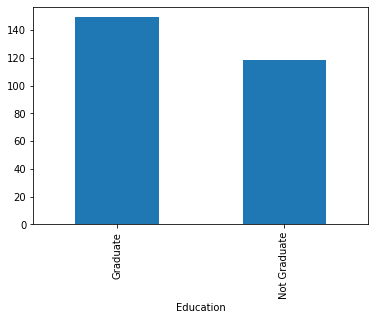

In [41]:
(Loan_data.groupby('Education').mean()['LoanAmount']).plot(kind= 'bar')

In [42]:
#Graduate people have got the highest loan amount

In [43]:
Q1 = Loan_data.quantile(0.25)
Q3 = Loan_data.quantile(0.75)

IQR = Q3 - Q1

In [44]:
percentile_25 = Loan_data.quantile(0.25)
percentile_75 = Loan_data.quantile(0.75)

In [45]:
IQR = percentile_75 - percentile_25

In [46]:
upper_limit = percentile_75 + 1.5*IQR
lower_limit = percentile_25 - 1.5*IQR

In [47]:
upper_limit

ApplicantIncome      9477.5
CoapplicantIncome    5912.5
LoanAmount            255.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [48]:
lower_limit

ApplicantIncome     -1086.5
CoapplicantIncome   -3547.5
LoanAmount              7.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [49]:
Loan_data1=Loan_data.copy()

In [50]:
features=Loan_data1.select_dtypes(include=['int64','float64'])

In [51]:
def capping(df,cols,iqr_value):#factor=1.5 iqr value
    for i in cols:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        upper_limit=Q3+(IQR*iqr_value)
        lower_limit=Q1-(IQR*iqr_value)
        df[i]=np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

In [52]:
capping(Loan_data1,features,1.5)

In [53]:
Loan_data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.0,902.0
mean,4466.308869,1423.644159,135.495807,360.0,1.0
std,2268.305740,1619.356444,53.201694,0.0,0.0
min,0.000000,0.000000,9.000000,360.0,1.0
25%,2875.000000,0.000000,100.000000,360.0,1.0
50%,3800.000000,1110.000000,126.000000,360.0,1.0
75%,5516.000000,2365.000000,162.000000,360.0,1.0
max,9477.500000,5912.500000,255.000000,360.0,1.0


0.9627084934816618


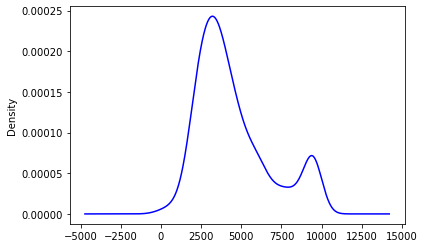

In [54]:
(Loan_data1['ApplicantIncome'].plot(kind = 'kde' ,color = 'blue'))
print(Loan_data1['ApplicantIncome'].skew())

0.9950183505692877


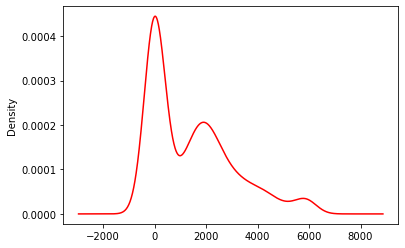

In [55]:
Loan_data1['CoapplicantIncome'].plot(kind = 'kde' , color = 'red')
print(Loan_data1['CoapplicantIncome'].skew())

0.6227253347383991


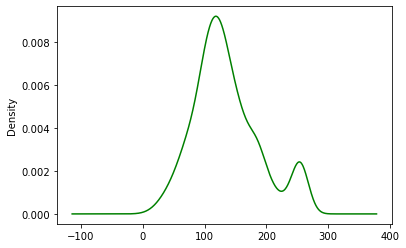

In [56]:
Loan_data1['LoanAmount'].plot(kind = 'kde' , color = 'green')
print(Loan_data1['LoanAmount'].skew())

0


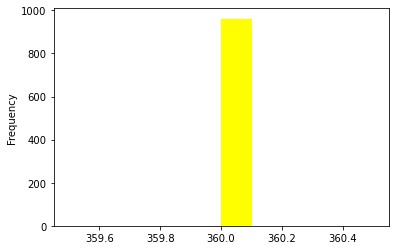

In [57]:
Loan_data1['Loan_Amount_Term'].plot(kind = 'hist' , color = 'yellow')
print(Loan_data1['Loan_Amount_Term'].skew())

In [58]:
Loan_data= Loan_data.drop(['Loan_ID'], axis=1)

In [59]:
Loan_data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [60]:
#Handling Missing Values, mean/median--------> numerical_variables 
#most_frequent-----> categorical variables

In [61]:
Loan_data['LoanAmount'].fillna(Loan_data['LoanAmount'].mean(), inplace = True)

In [62]:
Loan_data['Loan_Amount_Term'].fillna(Loan_data['Loan_Amount_Term'].mean(), inplace =  True)

In [63]:
Loan_data['Credit_History'].fillna(Loan_data['Credit_History'].mean(), inplace = True)

In [64]:
Loan_data['Gender'].fillna(Loan_data['Gender'].mode()[0], inplace = True)
Loan_data['Married'].fillna(Loan_data['Married'].mode()[0],inplace = True)
Loan_data['Dependents'].fillna(Loan_data['Dependents'].mode()[0],inplace = True)
Loan_data['Self_Employed'].fillna(Loan_data['Self_Employed'].mode()[0],inplace = True)
Loan_data['Loan_Status'].fillna(Loan_data['Loan_Status'].mode()[0],inplace = True)

In [65]:
Loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

0.9950183505692877

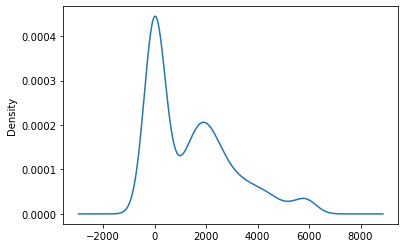

In [66]:
Loan_data1['CoapplicantIncome'].plot(kind= 'kde')
Loan_data1['CoapplicantIncome'].skew()

In [67]:
Loan_data1['CoapplicantIncome'] = np.sqrt(Loan_data1['CoapplicantIncome'])

0.18282095276804733

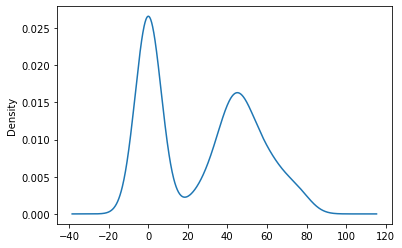

In [68]:
Loan_data1['CoapplicantIncome'].plot(kind = 'kde')
Loan_data1['CoapplicantIncome'].skew()

0.6227253347383991

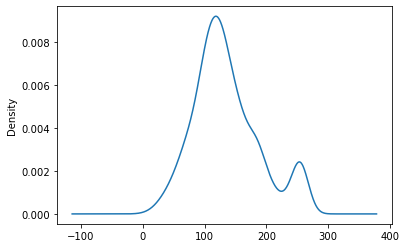

In [69]:
Loan_data1['LoanAmount'].plot(kind= 'kde')
Loan_data1['LoanAmount'].skew()

In [70]:
Loan_data1['LoanAmount'] = np.sqrt(Loan_data1['LoanAmount'])

0.028960581658193603

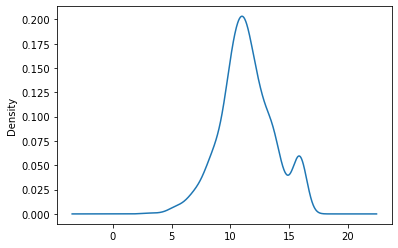

In [71]:
Loan_data1['LoanAmount'].plot(kind = 'kde')
Loan_data1['LoanAmount'].skew()

0.9627084934816618


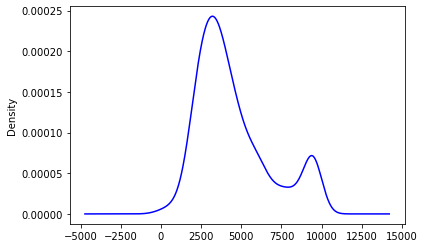

In [72]:
Loan_data1['ApplicantIncome'].plot(kind = 'kde' ,color = 'blue')
print(Loan_data1['ApplicantIncome'].skew())

In [73]:
Loan_data1['ApplicantIncome'] = np.sqrt(Loan_data1['ApplicantIncome'])

0.3703790563986101


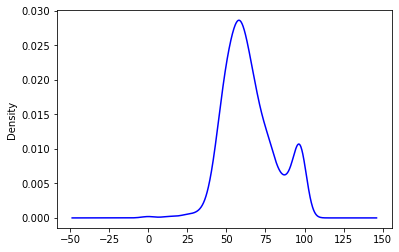

In [74]:
Loan_data1['ApplicantIncome'].plot(kind = 'kde' ,color = 'blue')
print(Loan_data1['ApplicantIncome'].skew())

0


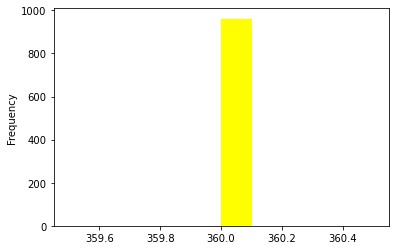

In [75]:
Loan_data1['Loan_Amount_Term'].plot(kind = 'hist' , color = 'yellow')
print(Loan_data1['Loan_Amount_Term'].skew())

In [76]:
Loan_data1['Loan_Amount_Term'] = np.log(Loan_data1['Loan_Amount_Term'])

0


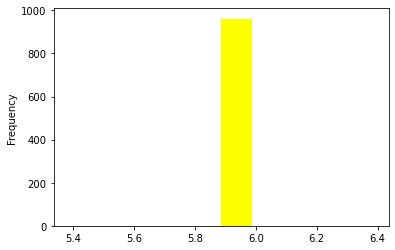

In [77]:
Loan_data1['Loan_Amount_Term'].plot(kind = 'hist' , color = 'yellow')
print(Loan_data1['Loan_Amount_Term'].skew())

In [78]:
X = Loan_data.drop(columns= ['Loan_Status'], axis=1)
y = Loan_data['Loan_Status']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state = 0)

In [80]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [81]:
from imblearn.over_sampling import RandomOverSampler

In [82]:
os=RandomOverSampler(0.5)

C:\Users\sayan\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [83]:
X_train_res, y_train_res = os.fit_resample(X_train,y_train)

In [84]:
X_train_res.shape, y_train_res.shape

((937, 11), (937,))

In [85]:
from collections import Counter
print("original dataset shape {}". format(Counter(y_train)))
print("resampled dataset shape{}".format(Counter(y_train_res)))

original dataset shape Counter({'Y': 625, 'N': 159})
resampled dataset shapeCounter({'Y': 625, 'N': 312})


In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [87]:
transformer = ColumnTransformer(transformers= [
    ('trf', OneHotEncoder(drop = 'first', dtype = 'int32', sparse = False), ['Gender','Married', 'Dependents', 'Education',
                                                             'Self_Employed', 'Property_Area'])
       
], remainder = 'passthrough')

In [88]:
X_train_new=transformer.fit_transform(X_train_res)

In [89]:
X_test_new= transformer.transform(X_test)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
Sc=StandardScaler()

In [92]:
X_train_scale = Sc.fit_transform(X_train_new)

In [93]:
X_test_scale = Sc.transform(X_test_new)

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
y_train= le.fit_transform(y_train_res)

In [96]:
y_test= le.fit_transform(y_test)

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [98]:
lr=LogisticRegression()

In [99]:
lr.fit(X_train_scale,y_train)

LogisticRegression()

In [100]:
y_pred = lr.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[ 12  21]
 [ 14 150]]
Accuracy score 82.23350253807106
classification report               precision    recall  f1-score   support

           0       0.46      0.36      0.41        33
           1       0.88      0.91      0.90       164

    accuracy                           0.82       197
   macro avg       0.67      0.64      0.65       197
weighted avg       0.81      0.82      0.81       197



In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
DT = DecisionTreeClassifier()

In [103]:
DT.fit(X_train_scale, y_train)

DecisionTreeClassifier()

In [104]:
y_pred = DT.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[ 10  23]
 [ 29 135]]
Accuracy score 73.60406091370558
classification report               precision    recall  f1-score   support

           0       0.26      0.30      0.28        33
           1       0.85      0.82      0.84       164

    accuracy                           0.74       197
   macro avg       0.56      0.56      0.56       197
weighted avg       0.75      0.74      0.74       197



In [105]:
from sklearn.svm import SVC

In [106]:
classifier=SVC(kernel='rbf',random_state=2)

In [107]:
classifier.fit(X_train_scale,y_train)

SVC(random_state=2)

In [108]:
y_pred = classifier.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[  9  24]
 [ 12 152]]
Accuracy score 81.7258883248731
classification report               precision    recall  f1-score   support

           0       0.43      0.27      0.33        33
           1       0.86      0.93      0.89       164

    accuracy                           0.82       197
   macro avg       0.65      0.60      0.61       197
weighted avg       0.79      0.82      0.80       197



In [109]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(SVC(), X_train_scale, y_train, cv =5, n_jobs =-1,scoring ='accuracy'))*100

75.55808396859712

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
RF = RandomForestClassifier(max_samples = 0.60, random_state = 52)

In [112]:
RF.fit(X_train_scale, y_train)

RandomForestClassifier(max_samples=0.6, random_state=52)

In [113]:
y_pred = RF.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[  7  26]
 [ 10 154]]
Accuracy score 81.7258883248731
classification report               precision    recall  f1-score   support

           0       0.41      0.21      0.28        33
           1       0.86      0.94      0.90       164

    accuracy                           0.82       197
   macro avg       0.63      0.58      0.59       197
weighted avg       0.78      0.82      0.79       197



In [114]:
#HYPERPARAMETRE TUNING FOR RANDOM FOREST CLASSIFIER

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num=10)]

#measuring the quality of a split
criterion = ['gini', 'entropy']

#maximum depth of the tree
max_depth = [int(x) for x in np.linspace(10,100,10)]

#minimum number of samples required to split a node
min_samples_split= [2,4,5,6,8]

#minimum number of samples required to be at a leaf node
min_samples_leaf = [1,2,3,4,8,10] 

#number of features to consider
max_features = ['auto', 'sqrt','log2']

#Whether bootstrap samples are used when building trees
bootstrap = ['True', 'False']

#the number of samples to draw from X 
max_samples = [0.5, 0.75, 1.0, None]

In [117]:
#creating random grid
random_grid = {'n_estimators': n_estimators,
              'criterion': criterion, 
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'max_samples': max_samples
              }
print(random_grid)

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 4, 5, 6, 8], 'min_samples_leaf': [1, 2, 3, 4, 8, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': ['True', 'False'], 'max_samples': [0.5, 0.75, 1.0, None]}


In [118]:
rf = RandomForestClassifier()

In [119]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv= 5, verbose =2, random_state =50,
                              n_jobs= -1)

In [120]:
rf_random.fit(X_train_scale, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.5, 0.75, 1.0, None],
                                        'min_samples_leaf': [1, 2, 3, 4, 8, 10],
                                        'min_samples_split': [2, 4, 5, 6, 8],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]},
 

In [121]:
best_random_grid=rf_random.best_params_
best_random_grid

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.75,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': 'False'}

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = rf_random.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[ 10  23]
 [ 13 151]]
Accuracy score 81.7258883248731
classification report               precision    recall  f1-score   support

           0       0.43      0.30      0.36        33
           1       0.87      0.92      0.89       164

    accuracy                           0.82       197
   macro avg       0.65      0.61      0.63       197
weighted avg       0.80      0.82      0.80       197



In [123]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.75,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': 'False'}

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid = { 'criterion' : [rf_random.best_params_['criterion']],
              'max_depth' : [rf_random.best_params_['max_depth']],
              'bootstrap':      ['True', 'False'],
              'min_samples_split' : [2,6,12,15],
              'min_samples_leaf' : [5,10,15,20], 
              'max_leaf_nodes' : [10,20,None],
              'max_samples' : [rf_random.best_params_['max_samples']],
              'n_estimators' : [rf_random.best_params_['n_estimators'],rf_random.best_params_['n_estimators']-100,
                               rf_random.best_params_['n_estimators']+200,rf_random.best_params_['n_estimators']+100],
              'oob_score' : ['True', 'False'],
               }
print(param_grid)
                 

{'criterion': ['gini'], 'max_depth': [20], 'bootstrap': ['True', 'False'], 'min_samples_split': [2, 6, 12, 15], 'min_samples_leaf': [5, 10, 15, 20], 'max_leaf_nodes': [10, 20, None], 'max_samples': [0.75], 'n_estimators': [100, 0, 300, 200], 'oob_score': ['True', 'False']}


In [126]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv= 5, n_jobs= -1,verbose=2)
grid_search.fit(X_train_scale,y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


C:\Users\sayan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
960 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sayan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sayan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\sayan\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater th

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'], 'criterion': ['gini'],
                         'max_depth': [20], 'max_leaf_nodes': [10, 20, None],
                         'max_samples': [0.75],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [2, 6, 12, 15],
                         'n_estimators': [100, 0, 300, 200],
                         'oob_score': ['True', 'False']},
             verbose=2)

In [127]:
best_grid = grid_search.best_params_
best_grid

{'bootstrap': 'False',
 'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': None,
 'max_samples': 0.75,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300,
 'oob_score': 'False'}

In [128]:
grid_search.best_score_

0.7737342132210718

In [129]:
y_pred = grid_search.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[ 13  20]
 [ 14 150]]
Accuracy score 82.74111675126903
classification report               precision    recall  f1-score   support

           0       0.48      0.39      0.43        33
           1       0.88      0.91      0.90       164

    accuracy                           0.83       197
   macro avg       0.68      0.65      0.67       197
weighted avg       0.82      0.83      0.82       197



In [130]:
#HYPERPARAMETRE TUNING FOR DECISION TREE 

In [131]:

#measuring the quality of a split
criterion = ['gini', 'entropy']

#maximum depth of the tree
max_depth = [int(x) for x in np.linspace(10,100,10)]

#minimum number of samples required to split a node
min_samples_split= [2,4,5,6,8]

#minimum number of samples required to be at a leaf node
min_samples_leaf = [1,2,3,4,8,10] 

#number of features to consider
max_features = ['auto', 'sqrt','log2']

#The strategy used to choose the split at each node. 
splitter = ['best', 'random']

max_leaf_nodes = [5,10,15,20]

In [132]:
random_grid = {'splitter' : splitter,
              'criterion': criterion, 
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'max_leaf_nodes' : max_leaf_nodes,
            
              }
print(random_grid)

{'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 4, 5, 6, 8], 'min_samples_leaf': [1, 2, 3, 4, 8, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [5, 10, 15, 20]}


In [133]:
dt=DecisionTreeClassifier()

In [134]:
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv= 5, verbose =2, random_state =50,
                              n_jobs= -1)

In [135]:
dt_random.fit(X_train_scale, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 8, 10],
                                        'min_samples_split': [2, 4, 5, 6, 8],
                                        'splitter': ['best', 'random']},
                   random_state=50, verbose=2)

In [136]:
best_random_grid=dt_random.best_params_
best_random_grid

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 15,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy'}

In [137]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = dt_random.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[  4  29]
 [  6 158]]
Accuracy score 82.23350253807106
classification report               precision    recall  f1-score   support

           0       0.40      0.12      0.19        33
           1       0.84      0.96      0.90       164

    accuracy                           0.82       197
   macro avg       0.62      0.54      0.54       197
weighted avg       0.77      0.82      0.78       197



In [138]:
#HYPERPARAMETRE TUNING FOR SUPPORT VECTOR MACHINES

In [139]:
#C:-Regularization parameter. The strength of the regularization is inversely proportional to C.
#kernel:-Specifies the kernel type to be used in the algorithm.
#gamma:-Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#max_iter:-Hard limit on iterations within solver.
#tol:-Tolerance for stopping criterion.

In [140]:
param_grid={'C':[0.1,0.01,1,0.001],
           'gamma':[1,0.1,0.01,0.001],
           'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
           'max_iter':[100,1000,2500,5000],
           'tol':[0.001,0.01,0.1]}

In [141]:
svm_model = SVC()

In [142]:
grid_search = GridSearchCV(estimator = svm_model, param_grid = param_grid, cv= 4, n_jobs= -1,verbose=2)
grid_search.fit(X_train_scale,y_train)

Fitting 4 folds for each of 768 candidates, totalling 3072 fits


C:\Users\sayan\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 1, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 1000, 2500, 5000],
                         'tol': [0.001, 0.01, 0.1]},
             verbose=2)

In [143]:
best_grid = grid_search.best_params_
best_grid

{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 1000, 'tol': 0.001}

In [144]:
grid_search.best_score_

0.8217812329514457

In [145]:
y_pred = grid_search.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[  5  28]
 [  5 159]]
Accuracy score 83.24873096446701
classification report               precision    recall  f1-score   support

           0       0.50      0.15      0.23        33
           1       0.85      0.97      0.91       164

    accuracy                           0.83       197
   macro avg       0.68      0.56      0.57       197
weighted avg       0.79      0.83      0.79       197



In [146]:
#HYPERPARAMETRE TUNING FOR LOGISTIC REGRESSION

In [147]:
#penalty:-specify which type of regularization technique used.
#tol:-Tolerance for stopping criterion.
#C:-Regularization parameter. The strength of the regularization is inversely proportional to C.
#solver:-algorithm to use in the optimization problem.
#max_iter:-Maximum number of iteration taken to converge.


In [148]:
param_grid={'C':[0.1,0.01,1,0.001],
           'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter':[100,1000,2500,5000],
            'tol':[0.001,0.01,0.1]}

In [149]:
log_reg=LogisticRegression()

In [150]:
grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid, cv= 4, n_jobs= -1,verbose=2)
grid_search.fit(X_train_scale,y_train)

Fitting 4 folds for each of 960 candidates, totalling 3840 fits


C:\Users\sayan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1728 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sayan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 1, 0.001],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.001, 0.01, 0.1]},
             verbose=2)

In [151]:
best_grid = grid_search.best_params_
best_grid

{'C': 0.1, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}

In [152]:
grid_search.best_score_

0.7545099108928897

In [153]:
y_pred = grid_search.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred)*100))
print('classification report {}'.format(classification_report(y_test, y_pred)))

[[ 12  21]
 [ 14 150]]
Accuracy score 82.23350253807106
classification report               precision    recall  f1-score   support

           0       0.46      0.36      0.41        33
           1       0.88      0.91      0.90       164

    accuracy                           0.82       197
   macro avg       0.67      0.64      0.65       197
weighted avg       0.81      0.82      0.81       197



# Conclusions and Interpretation 

It can be noticed that our results are comparable and in certain cases the accuracy score has improved.Our RandomForest Classifier(GridSearch cv)and Support Vector Classifier using GridSearch Cv was one of the best performing model with an accuracy of 83.24%.In general,it can be seen that all the models have acheived an accuracy score of above 70%.